In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
# Importing training dataset
train_dataset = pd.read_excel("Data//log.xlsx")
x_train = np.array(train_dataset[['GR','SP','Rt','Rxo','DEN','SONIC','CNL','DIP']])
y_train = np.array(train_dataset[['MUDLOG']])
y_train = y_train.reshape(len(y_train))

In [3]:
# Training the model
clustering = DBSCAN(eps=15, min_samples=200).fit(x_train, y_train)

In [4]:
print(f'Clusters: {np.unique(clustering.labels_)[0], np.unique(clustering.labels_)[1]}')

Clusters: (-1, 0)


In [5]:
# model information
clustering.get_params()

{'algorithm': 'auto',
 'eps': 15,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 200,
 'n_jobs': None,
 'p': None}

In [6]:
y_pred = np.array(clustering.labels_)

# Just renaming cluster labels into 0 and 1
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 1
    if y_pred[i] == -1:
        y_pred[i] = 0

In [7]:
# Accuracy :
accuracy = metrics.accuracy_score(y_train, y_pred, normalize=True, sample_weight=None)
print(f'Accuracy of the model is : {accuracy*100}%')

Accuracy of the model is : 100.0%


Text(0.5, 1.0, 'Predicted')

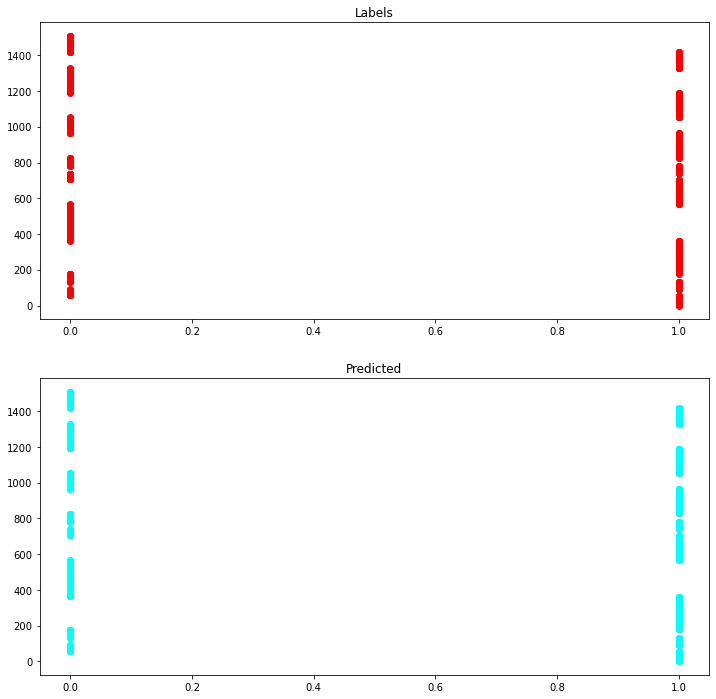

In [8]:
# Visualization
x = [i for i in range(len(y_train))]
fig, axs = plt.subplots(2, figsize=(12,12))
axs[0].scatter(y_train, x, color='red')
axs[0].set_title('Labels')
axs[1].scatter(y_pred, x, color='cyan')
axs[1].set_title('Predicted')
